In [92]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [93]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [94]:
# Change name format to have underscore
sales.rename(columns={
    "Invoice ID": "Invoice_ID",
    "Customer type": "Customer_type",
    "Product line": "Product_line",
    "Unit price": "Unit_price",
    "Tax 5%": "Tax_5%",
    "gross margin percentage": "gross_margin_percentage",
    "gross income": "gross_income"
}, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [95]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

429


In [96]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [97]:
X_train.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
407,725-32-9708,B,Mandalay,Member,Female,Fashion accessories,68.71,4,13.7420,1/4/2019,19:01,Cash,274.84,4.761905,13.7420,4.1
83,787-56-0757,C,Naypyitaw,Member,Female,Food and beverages,80.36,4,16.0720,2/23/2019,18:45,Credit card,321.44,4.761905,16.0720,8.3
416,750-57-9686,C,Naypyitaw,Normal,Female,Home and lifestyle,45.38,4,9.0760,1/8/2019,13:48,Credit card,181.52,4.761905,9.0760,8.7
318,704-20-4138,C,Naypyitaw,Member,Female,Health and beauty,29.67,7,10.3845,3/11/2019,18:58,Credit card,207.69,4.761905,10.3845,8.1
722,776-68-1096,B,Mandalay,Normal,Male,Home and lifestyle,44.12,3,6.6180,3/18/2019,13:45,Credit card,132.36,4.761905,6.6180,7.9


In [98]:
y_train.head()

407    288.5820
83     337.5120
416    190.5960
318    218.0745
722    138.9780
Name: Total, dtype: float64

In [99]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 407 to 319
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer_type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product_line             700 non-null    object 
 6   Unit_price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax_5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross_margin_percentage  700 non-null    float64
 14  gross_income             700 

In [100]:
X_train_copy.isnull().sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
Tax_5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
dtype: int64

In [101]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
407,68.71,4,13.7420,274.84,4.761905,13.7420,4.1
83,80.36,4,16.0720,321.44,4.761905,16.0720,8.3
416,45.38,4,9.0760,181.52,4.761905,9.0760,8.7
318,29.67,7,10.3845,207.69,4.761905,10.3845,8.1
722,44.12,3,6.6180,132.36,4.761905,6.6180,7.9


In [102]:
num_data.describe()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.519529,5.485714,15.296104,305.922071,4.761905e+00,15.296104,6.953857
std,26.121872,2.937318,11.672327,233.446535,5.244000e-14,11.672327,1.685043
min,10.160000,1.000000,0.627000,12.540000,4.761905e+00,0.627000,4.000000
25%,33.132500,3.000000,5.924875,118.497500,4.761905e+00,5.924875,5.500000
50%,54.995000,5.000000,11.999250,239.985000,4.761905e+00,11.999250,6.900000
75%,77.477500,8.000000,22.748250,454.965000,4.761905e+00,22.748250,8.400000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit_price'>

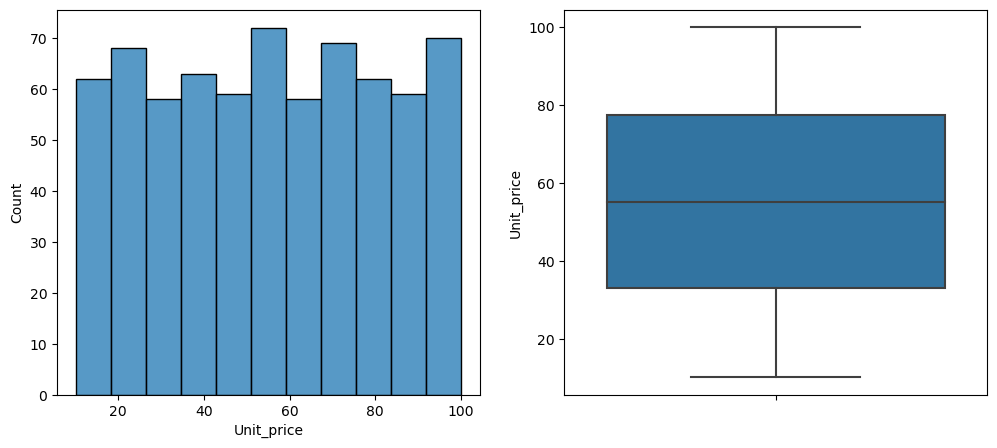

In [103]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit_price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit_price", ax=ax[1])

In [104]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

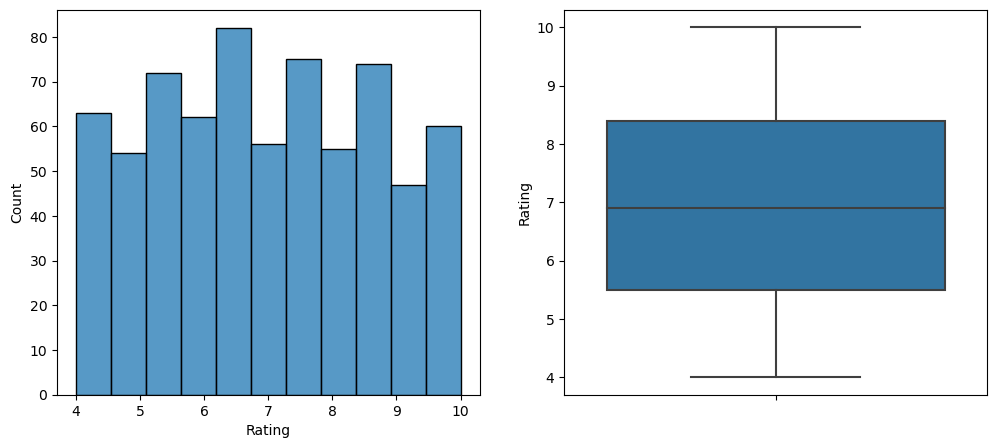

In [105]:
visualize_numeric_feature(X_train_copy, 'Rating')

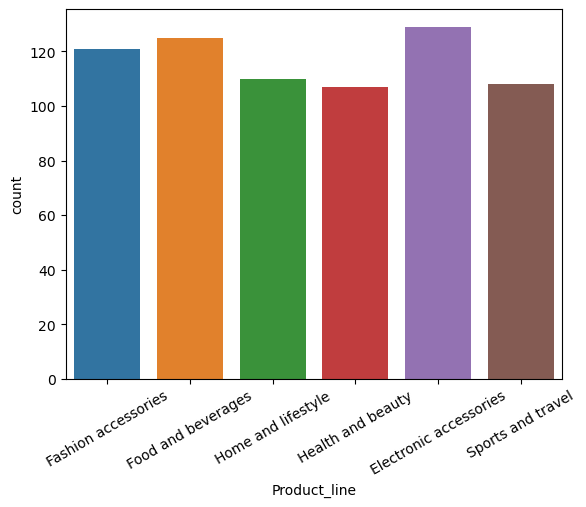

In [106]:
sns.countplot(data=X_train_copy, x="Product_line")
plt.xticks(rotation=30);

In [107]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
407,725-32-9708,B,Mandalay,Member,Female,Fashion accessories,1/4/2019,19:01,Cash
83,787-56-0757,C,Naypyitaw,Member,Female,Food and beverages,2/23/2019,18:45,Credit card
416,750-57-9686,C,Naypyitaw,Normal,Female,Home and lifestyle,1/8/2019,13:48,Credit card
318,704-20-4138,C,Naypyitaw,Member,Female,Health and beauty,3/11/2019,18:58,Credit card
722,776-68-1096,B,Mandalay,Normal,Male,Home and lifestyle,3/18/2019,13:45,Credit card


In [108]:
cat_feature.describe()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
count,700,700,700,700,700,700,700,700,700
unique,700,3,3,2,2,6,89,419,3
top,725-32-9708,B,Mandalay,Member,Male,Electronic accessories,2/7/2019,17:38,Cash
freq,1,237,237,355,363,129,17,5,244


In [109]:
cat_feature.isnull().sum()

Invoice_ID       0
Branch           0
City             0
Customer_type    0
Gender           0
Product_line     0
Date             0
Time             0
Payment          0
dtype: int64

In [110]:
pd.unique(cat_feature["Product_line"])

array(['Fashion accessories', 'Food and beverages', 'Home and lifestyle',
       'Health and beauty', 'Electronic accessories', 'Sports and travel'],
      dtype=object)

In [111]:
#X_train_copy['Product_line'] = X_train_copy['Product_line'].map({
#    'Electronic accessories': 'EA',
#    'Health and beauty': 'HAB',
#    'Fashion accessories': 'FA',
#    'Sports and travel': 'SAT',
#    'Food and beverages': 'FAB',
#    'Home and lifestyle': 'HAL'
#})

#pd.unique(X_train_copy['Product_line'])

In [112]:
X_train_copy.groupby(by=['City', 'Product_line']).size()

City       Product_line          
Mandalay   Electronic accessories    43
           Fashion accessories       41
           Food and beverages        37
           Health and beauty         38
           Home and lifestyle        36
           Sports and travel         42
Naypyitaw  Electronic accessories    41
           Fashion accessories       44
           Food and beverages        48
           Health and beauty         35
           Home and lifestyle        31
           Sports and travel         28
Yangon     Electronic accessories    45
           Fashion accessories       36
           Food and beverages        40
           Health and beauty         34
           Home and lifestyle        43
           Sports and travel         38
dtype: int64

In [113]:
# Handling categorical data
cat_feats = X_train.select_dtypes(include=['object'])
cat_feats.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Date,Time,Payment
407,725-32-9708,B,Mandalay,Member,Female,Fashion accessories,1/4/2019,19:01,Cash
83,787-56-0757,C,Naypyitaw,Member,Female,Food and beverages,2/23/2019,18:45,Credit card
416,750-57-9686,C,Naypyitaw,Normal,Female,Home and lifestyle,1/8/2019,13:48,Credit card
318,704-20-4138,C,Naypyitaw,Member,Female,Health and beauty,3/11/2019,18:58,Credit card
722,776-68-1096,B,Mandalay,Normal,Male,Home and lifestyle,3/18/2019,13:45,Credit card


In [114]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [115]:
ohe_feature_name = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_name

array(['Invoice_ID_101-17-6199', 'Invoice_ID_101-81-4070',
       'Invoice_ID_105-10-6182', ..., 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet'], dtype=object)

In [116]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating
0,68.71,4,13.7420,274.84,4.761905,13.7420,4.1
1,80.36,4,16.0720,321.44,4.761905,16.0720,8.3
2,45.38,4,9.0760,181.52,4.761905,9.0760,8.7
3,29.67,7,10.3845,207.69,4.761905,10.3845,8.1
4,44.12,3,6.6180,132.36,4.761905,6.6180,7.9


In [117]:
cat_feats_train = X_train.select_dtypes(include=['object'])
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_name)
X_train_cat_ohe.head()

,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_105-10-6182,Invoice_ID_106-35-6779,Invoice_ID_109-28-2512,Invoice_ID_110-05-6330,Invoice_ID_110-48-7033,Invoice_ID_114-35-5271,Invoice_ID_115-38-7388,Invoice_ID_115-99-4379,...,Time_20:44,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_105-10-6182,...,Time_20:44,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,68.71,4,13.7420,274.84,4.761905,13.7420,4.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.36,4,16.0720,321.44,4.761905,16.0720,8.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,45.38,4,9.0760,181.52,4.761905,9.0760,8.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,29.67,7,10.3845,207.69,4.761905,10.3845,8.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,44.12,3,6.6180,132.36,4.761905,6.6180,7.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
final_columns = X_train_final.columns.values
final_columns

array(['Unit_price', 'Quantity', 'Tax_5%', ..., 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet'], dtype=object)

In [120]:
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_name)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]

X_test_final.head()

,Unit_price,Quantity,Tax_5%,cogs,gross_margin_percentage,gross_income,Rating,Invoice_ID_101-17-6199,Invoice_ID_101-81-4070,Invoice_ID_105-10-6182,...,Time_20:44,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,47.65,3,7.1475,142.95,4.761905,7.1475,9.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.43,10,10.7150,214.30,4.761905,10.7150,6.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19.77,10,9.8850,197.70,4.761905,9.8850,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,15.69,3,2.3535,47.07,4.761905,2.3535,5.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,51.34,8,20.5360,410.72,4.761905,20.5360,7.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Total', ylabel='Count'>

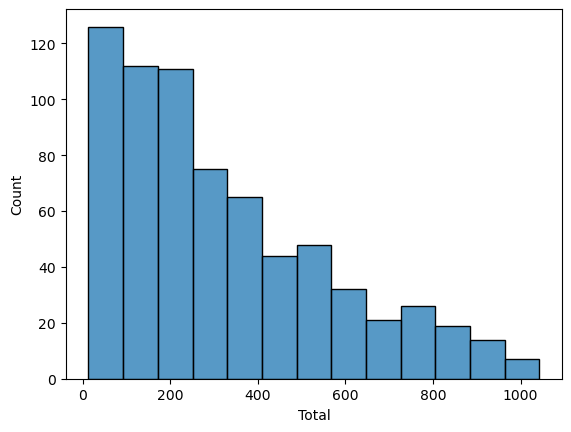

In [121]:
# Modeling

sns.histplot(y_train)

In [123]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate

ModuleNotFoundError: No module named 'lightgbm'